<a href="https://colab.research.google.com/github/Syeda-Quratul-aeen/Youtube-analysis/blob/main/youtubeAPIanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from googleapiclient.discovery import build
import pandas as pd
from IPython.display import JSON
from dateutil import parser
import isodate

#Data viz packages
import seaborn as sns
import matplotlib.pyplot as plt

#NLP
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [19]:
channels_id=[
             #add channels here
             ]

In [45]:
request = youtube.channels().list(
            part="snippet,contentDetails,statistics",
            id=','.join(channels_id)
        )
response = request.execute()


In [46]:

api_service_name = "youtube"
api_version = "v3"
def get_channel_stats(youtube, channels_id):
    all_data=[]
    youtube = build(
        api_service_name, api_version, developerKey=api_key)

    request = youtube.channels().list(
            part="snippet,contentDetails,statistics",
            id=','.join(channels_id)
        )
    response = request.execute()

    #loop through the items
    for item in response['items']:
        data= {'channelName': item['snippet']['title'],
            'subscribers':item['statistics']['subscriberCount'],
            'views':item['statistics']['viewCount'],
            'totalViews':item['statistics']['videoCount'],
            'playlistId':item['contentDetails']['relatedPlaylists']['uploads']
            }
        all_data.append(data)

    return(pd.DataFrame(all_data))

In [47]:
youtube = build(
        api_service_name, api_version, developerKey=api_key)

request = youtube.channels().list(
            part="snippet,contentDetails,statistics",
            id=','.join(channels_id)
        )
response = request.execute()

In [48]:
JSON(response)

<IPython.core.display.JSON object>

In [49]:
channel_stats = get_channel_stats(youtube, channels_id)

In [50]:
channel_stats

,channelName,subscribers,views,totalViews,playlistId
0,Huda Beauty,4130000,177123180,335,UURSvEADlY-caz3sfDNwvR1A


In [63]:
playlist_id= '' # add playlist id here
def get_video_ids(youtube, playlist_id):
    video_ids = []
    next_page_token = None

    while True:
        request = youtube.playlistItems().list(
            part="snippet, contentDetails",
            playlistId=playlist_id,
            maxResults=50,
            pageToken=next_page_token
        )
        response = request.execute()

        for item in response['items']:
            video_ids.append(item['contentDetails']['videoId'])

        next_page_token = response.get("nextPageToken")
        if not next_page_token:
            break  # Exit the loop if there are no more pages

    return video_ids


In [64]:
video_ids=get_video_ids(youtube, playlist_id)

In [65]:
len(video_ids)

336

In [66]:
def get_video_details(youtube, video_ids):
    all_video_info = []
    request = youtube.videos().list(
            part="snippet, contentDetails, statistics",
            id=video_ids[0:5]
        )
    response = request.execute()

    for video in response["items"]:
        stats_to_keep = {'snippet': ["channelTitle", 'title', 'description','tags', 'publishedAt'],
                        'statistics': ['viewCount', 'likeCount','favoriteCount' ,'commentCount'],
                        'contentDetails':['duration', 'definition', 'caption']}
        video_info = {}
        video_info["video_id"]= video['id']

        for k in stats_to_keep.keys():
            for v in stats_to_keep[k]:
                try:
                    video_info[v] = video[k][v]
                except:
                    video_info[v] = None
        all_video_info.append(video_info)
    return pd.DataFrame(all_video_info)

In [67]:
video_df = get_video_details(youtube, video_ids)

In [68]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption
0,iBWtKGHQl40,Huda Beauty,The REALLY Weird Tool I Use to Prep My Underey...,,None,2024-05-16T08:23:18Z,13820,557,0,5,PT36S,hd,false
1,HRkZ6fKb58M,Huda Beauty,Sharing AAALL my secrets on how to bake and se...,This is the ONLY baking tutorial video you’re ...,"[Huda Beauty, Baking, Setting, huda, hudabeaut...",2024-05-14T17:54:58Z,1129810,15286,0,207,PT13M,hd,false
2,6uv01-YnwNo,Huda Beauty,Part 2: Going to KAYALI’s launch event for Van...,,None,2024-05-03T06:59:26Z,31818,1827,0,16,PT1M1S,hd,false
3,UTIQWMchCG0,Huda Beauty,Part 1: Getting ready to go to KAYALI launch e...,,None,2024-05-02T07:05:18Z,159459,8302,0,41,PT1M1S,hd,false
4,pEA6qAEuBEA,Huda Beauty,My fav brand of contacts are Diva avaiable on ...,,None,2024-04-30T12:58:52Z,13574,464,0,7,PT12S,hd,false


In [69]:
def get_comments(youtube, video_ids):
    all_comments = []
    for video_id in video_ids:
        request = youtube.commentThreads().list(
            part="snippet, replies",
            videoId=video_id
        )
    response = request.execute()

    for item in response.get('items', []):
        comment = item['snippet']['topLevelComment']['snippet']
        if comment['likeCount'] > 10 and comment['canRate']:
            comments.append({
                'text': comment['textDisplay'],
                'author': comment['authorDisplayName'],
                'likes': comment['likeCount'],
                'publishedAt': comment['publishedAt']
            })
        all_comments.append(comment)
    return pd.DataFrame(all_comments)

In [70]:
comments= get_comments(youtube, video_ids)

In [71]:
comments

,channelId,videoId,textDisplay,textOriginal,authorDisplayName,authorProfileImageUrl,authorChannelUrl,authorChannelId,canRate,viewerRating,likeCount,publishedAt,updatedAt
0,UCRSvEADlY-caz3sfDNwvR1A,eAw8_xtX8tc,omg now watching this in 2024. she changed a l...,omg now watching this in 2024. she changed a l...,@Legend1508,https://yt3.ggpht.com/ytc/AIdro_kSF-YoDCmazsGt...,http://www.youtube.com/@Legend1508,{'value': 'UCiWf8PBZXertSwSXvXDn5lQ'},True,none,3,2024-03-03T20:56:55Z,2024-03-03T20:56:55Z
1,UCRSvEADlY-caz3sfDNwvR1A,eAw8_xtX8tc,You are so gorgeous I wish i had your facial f...,You are so gorgeous I wish i had your facial f...,@zabavnaya-xt8tb,https://yt3.ggpht.com/ytc/AIdro_kXvTlnXWtAsHsg...,http://www.youtube.com/@zabavnaya-xt8tb,{'value': 'UCm9VHG9MQ7PjX-DoDUrIyvA'},True,none,0,2023-09-20T05:52:55Z,2023-09-20T05:52:55Z
2,UCRSvEADlY-caz3sfDNwvR1A,eAw8_xtX8tc,hey im gonna be starting my beauty brand soon ...,hey im gonna be starting my beauty brand soon ...,@ginamcgill_glam,https://yt3.ggpht.com/PZTuuMiIp77dk5qjI5KKcrX-...,http://www.youtube.com/@ginamcgill_glam,{'value': 'UCsO4cT0cp8qZT7sCmEhjmow'},True,none,0,2023-04-19T03:05:22Z,2023-04-19T03:05:22Z
3,UCRSvEADlY-caz3sfDNwvR1A,eAw8_xtX8tc,Pretty science day1 ❤️,Pretty science day1 ❤️,@Rrremannn,https://yt3.ggpht.com/5R8iV0YTe5iiBDRPUWwbCwzy...,http://www.youtube.com/@Rrremannn,{'value': 'UC5joCxmAxLdneGK6DnN94PA'},True,none,0,2022-06-30T07:50:48Z,2022-06-30T07:50:48Z
4,UCRSvEADlY-caz3sfDNwvR1A,eAw8_xtX8tc,I’m going to be the next you . Me and u have a...,I’m going to be the next you . Me and u have a...,@leandrocarmona5927,https://yt3.ggpht.com/ytc/AIdro_m23q3CbZ7gf9Zc...,http://www.youtube.com/@leandrocarmona5927,{'value': 'UCG95_52VikcXgTWghnwTuoQ'},True,none,0,2022-05-12T21:36:16Z,2022-05-12T21:36:16Z
5,UCRSvEADlY-caz3sfDNwvR1A,eAw8_xtX8tc,Today years old to know this video exists,Today years old to know this video exists,@trex7370,https://yt3.ggpht.com/Fs8NvB7DBZpIQEynx0Uqxexu...,http://www.youtube.com/@trex7370,{'value': 'UCoOI3dWXPM-3xS6QT-j7b1g'},True,none,2,2022-03-29T13:01:05Z,2022-03-29T13:01:05Z
6,UCRSvEADlY-caz3sfDNwvR1A,eAw8_xtX8tc,You look better with out filler,You look better with out filler,@mokamoka4055,https://yt3.ggpht.com/eJiafM0_2M0ZEI2vuU3gq8gZ...,http://www.youtube.com/@mokamoka4055,{'value': 'UC1AU9058CvW-rigAJSdJVdA'},True,none,2,2022-03-03T19:50:40Z,2022-03-03T19:50:40Z
7,UCRSvEADlY-caz3sfDNwvR1A,eAw8_xtX8tc,عراقيه مرت من هنا 2022,عراقيه مرت من هنا 2022,@user-jr4hy9us5n,https://yt3.ggpht.com/heVOi5itQpDUrSsFh-dPaWlU...,http://www.youtube.com/@user-jr4hy9us5n,{'value': 'UCQGyNE4nXY8S9nloTqXPLjA'},True,none,2,2022-02-15T16:07:47Z,2022-02-15T16:07:47Z
8,UCRSvEADlY-caz3sfDNwvR1A,eAw8_xtX8tc,Is there anyone here from 2021,Is there anyone here from 2021,@monaaccessories3003,https://yt3.ggpht.com/ytc/AIdro_kIB5IA6ctvzva_...,http://www.youtube.com/@monaaccessories3003,{'value': 'UCBY05MwxSNQvKvgxD6d6D4Q'},True,none,3,2021-12-16T21:53:32Z,2021-12-16T21:53:32Z
9,UCRSvEADlY-caz3sfDNwvR1A,eAw8_xtX8tc,Still watching In 2021 🤍❤️,Still watching In 2021 🤍❤️,@Catarinartin_,https://yt3.ggpht.com/UQaO5RqpAH2EGuNBSA8ngTpd...,http://www.youtube.com/@Catarinartin_,{'value': 'UC7YjW6GKz_5hZKaEkwy_cwg'},True,none,3,2021-11-24T09:45:42Z,2021-11-24T09:45:42Z


Data Pre-processing

In [72]:
video_df.isnull().any()

video_id         False
channelTitle     False
title            False
description      False
tags              True
publishedAt      False
viewCount        False
likeCount        False
favoriteCount    False
commentCount     False
duration         False
definition       False
caption          False
dtype: bool

In [73]:
video_df.dtypes

video_id         object
channelTitle     object
title            object
description      object
tags             object
publishedAt      object
viewCount        object
likeCount        object
favoriteCount    object
commentCount     object
duration         object
definition       object
caption          object
dtype: object

In [74]:
#converting to numeric data type
numeric_cols = ['viewCount','likeCount', 'favoriteCount', 'commentCount']
video_df[numeric_cols]= video_df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis=1)

In [75]:
video_df[numeric_cols].dtypes

viewCount        int64
likeCount        int64
favoriteCount    int64
commentCount     int64
dtype: object

In [76]:
#publish day in the week
video_df['publishedAt'] = video_df['publishedAt'].apply(lambda x: parser.parse(x))
video_df['publishDayName']= video_df['publishedAt'].apply(lambda x: x.strftime("%A"))


In [77]:

video_df['durationSecs'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x))
video_df['durationSecs'] = video_df['durationSecs'].astype('timedelta64[s]')

In [78]:
video_df[['durationSecs','duration']]

,durationSecs,duration
0,0 days 00:00:36,PT36S
1,0 days 00:13:00,PT13M
2,0 days 00:01:01,PT1M1S
3,0 days 00:01:01,PT1M1S
4,0 days 00:00:12,PT12S


In [79]:
#add tag count
video_df['tagCount'] = video_df['tags'].apply(lambda x:0 if x is None else len(x))

In [80]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption,publishDayName,durationSecs,tagCount
0,iBWtKGHQl40,Huda Beauty,The REALLY Weird Tool I Use to Prep My Underey...,,None,2024-05-16 08:23:18+00:00,13820,557,0,5,PT36S,hd,false,Thursday,0 days 00:00:36,0
1,HRkZ6fKb58M,Huda Beauty,Sharing AAALL my secrets on how to bake and se...,This is the ONLY baking tutorial video you’re ...,"[Huda Beauty, Baking, Setting, huda, hudabeaut...",2024-05-14 17:54:58+00:00,1129810,15286,0,207,PT13M,hd,false,Tuesday,0 days 00:13:00,24
2,6uv01-YnwNo,Huda Beauty,Part 2: Going to KAYALI’s launch event for Van...,,None,2024-05-03 06:59:26+00:00,31818,1827,0,16,PT1M1S,hd,false,Friday,0 days 00:01:01,0
3,UTIQWMchCG0,Huda Beauty,Part 1: Getting ready to go to KAYALI launch e...,,None,2024-05-02 07:05:18+00:00,159459,8302,0,41,PT1M1S,hd,false,Thursday,0 days 00:01:01,0
4,pEA6qAEuBEA,Huda Beauty,My fav brand of contacts are Diva avaiable on ...,,None,2024-04-30 12:58:52+00:00,13574,464,0,7,PT12S,hd,false,Tuesday,0 days 00:00:12,0


EXPLORATORY DATA ANALYSIS

Best Performing videos

<ipython-input-81-6bf52a32a4ca>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 129327 (\N{SHOCKED FACE WITH EXPLODING HEAD}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128064 (\N{EYES}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129327 (\N{SHOCKED FACE WITH EXPLODING HEAD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128064 (\N{EYES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


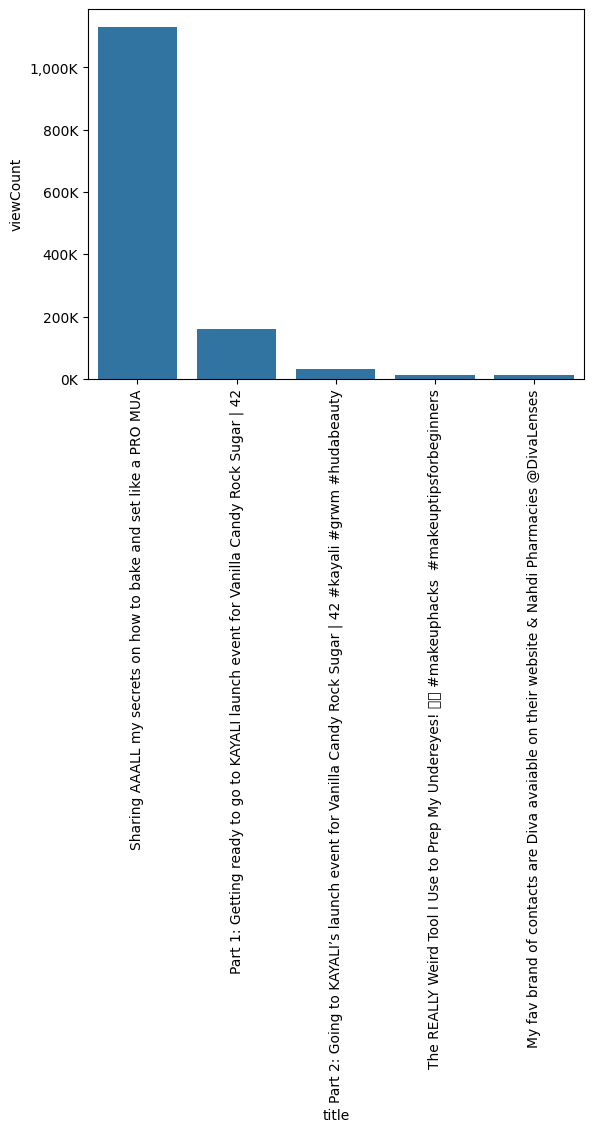

In [81]:
import matplotlib.ticker as ticker
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=False)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

Worst Performing videos

<ipython-input-82-ab66e68c0c56>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 129327 (\N{SHOCKED FACE WITH EXPLODING HEAD}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128064 (\N{EYES}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129327 (\N{SHOCKED FACE WITH EXPLODING HEAD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128064 (\N{EYES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


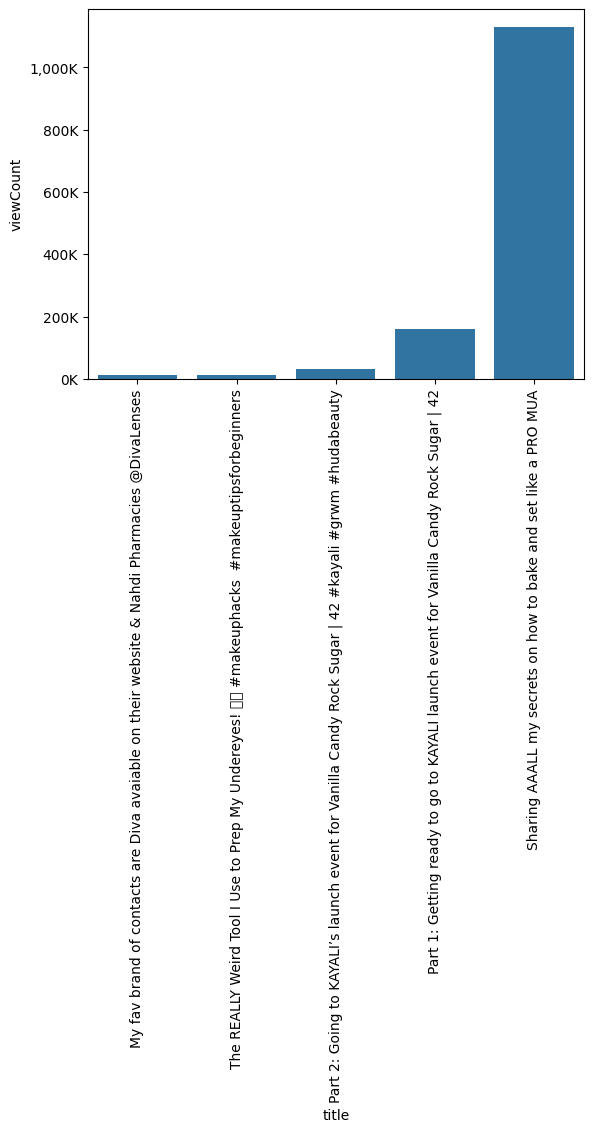

In [82]:
import matplotlib.ticker as ticker
ax = sns.barplot(x = 'title', y = 'viewCount', data = video_df.sort_values('viewCount', ascending=True)[0:9])
plot = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos:'{:,.0f}'.format(x/1000) + 'K'))

Views distribution per video

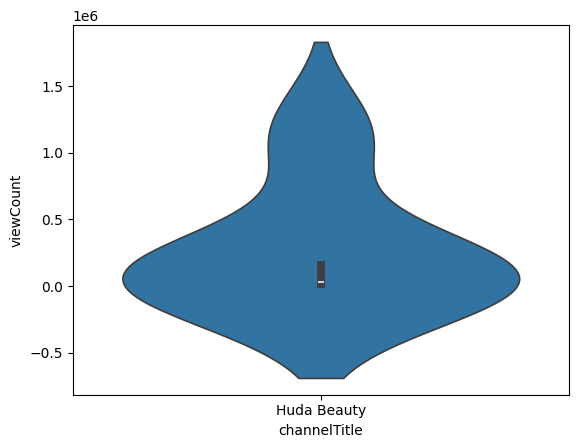

In [83]:
sns.violinplot(x='channelTitle', y='viewCount', data=video_df)

#plt.xticks(rotation=90)
plt.show()

<ipython-input-96-3db95a5fd190>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(video_df, x='viewCount', y='duration', inner='stick', palette='Dark2')


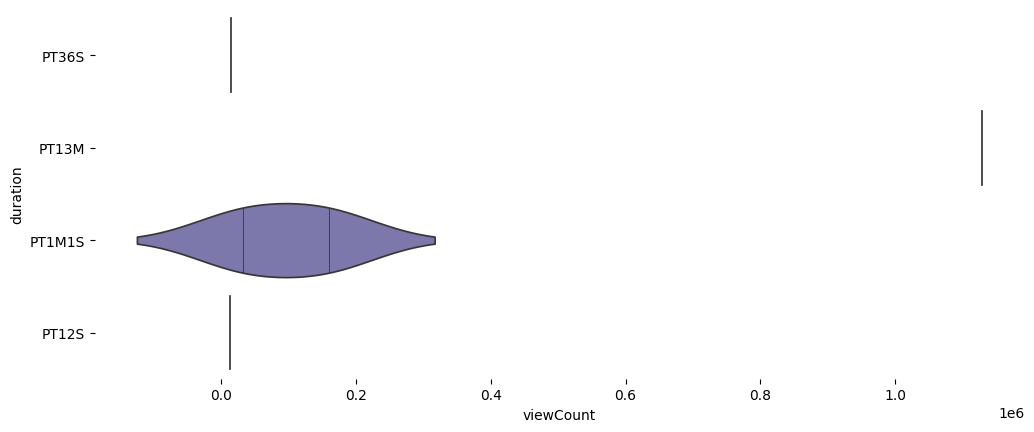

In [96]:
# @title duration vs viewCount

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(video_df['duration'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(video_df, x='viewCount', y='duration', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Views vs. likes and comments

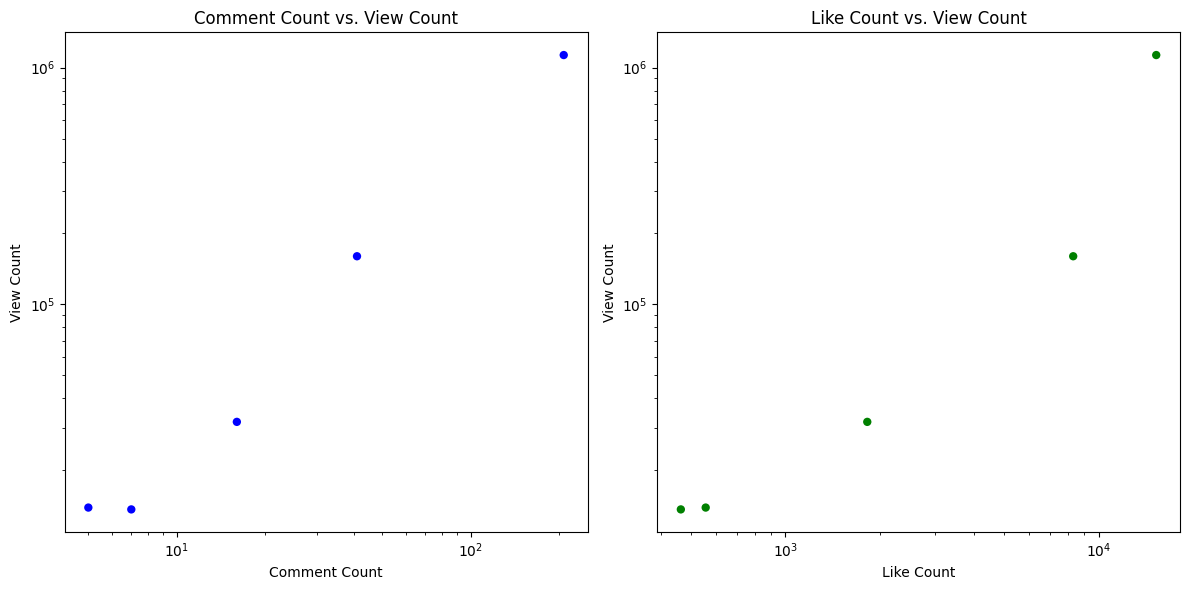

In [84]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# First scatter plot for comment count vs. view count
sns.scatterplot(data=video_df, x='commentCount', y='viewCount', ax=ax[0], color='blue', edgecolor='none')
ax[0].set_title('Comment Count vs. View Count')  # Title for the first subplot
ax[0].set_xlabel('Comment Count')  # X-axis label
ax[0].set_ylabel('View Count')  # Y-axis label
ax[0].set_xscale('log')  # Using log scale if data is skewed
ax[0].set_yscale('log')

# Second scatter plot for like count vs. view count
sns.scatterplot(data=video_df, x='likeCount', y='viewCount', ax=ax[1], color='green', edgecolor='none')
ax[1].set_title('Like Count vs. View Count')  # Title for the second subplot
ax[1].set_xlabel('Like Count')  # X-axis label
ax[1].set_ylabel('View Count')  # Y-axis label
ax[1].set_xscale('log')  # Using log scale if data is skewed
ax[1].set_yscale('log')

# Automatically adjust subplot params so that the subplot(s) fits in to the figure area
plt.tight_layout()

# Show the plot
plt.show()


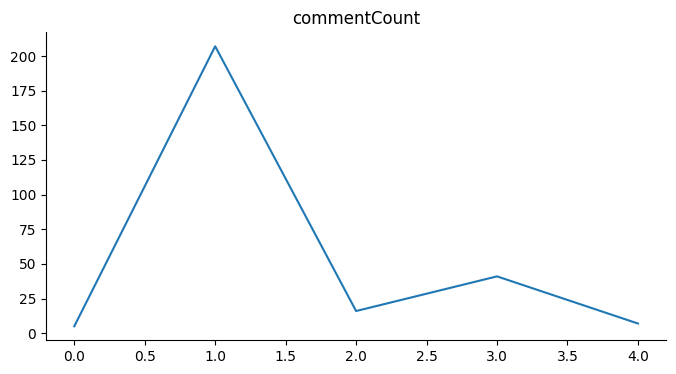

In [97]:
# @title commentCount

from matplotlib import pyplot as plt
video_df['commentCount'].plot(kind='line', figsize=(8, 4), title='commentCount')
plt.gca().spines[['top', 'right']].set_visible(False)

Video duration

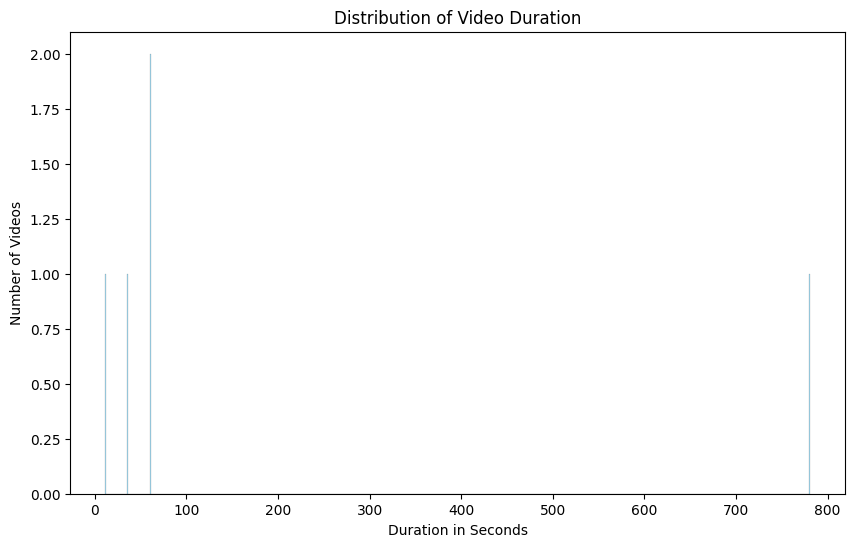

In [85]:
# Creating a histogram of the 'durationSecs' column
plt.figure(figsize=(10, 6))
hist_plot = sns.histplot(data=video_df, x='durationSecs', bins=10, color='skyblue', edgecolor='black')

# Adding title and labels
plt.title('Distribution of Video Duration')  # Add a title to the histogram
plt.xlabel('Duration in Seconds')  # Label for the x-axis
plt.ylabel('Number of Videos')  # Label for the y-axis

# Display the plot
plt.show()

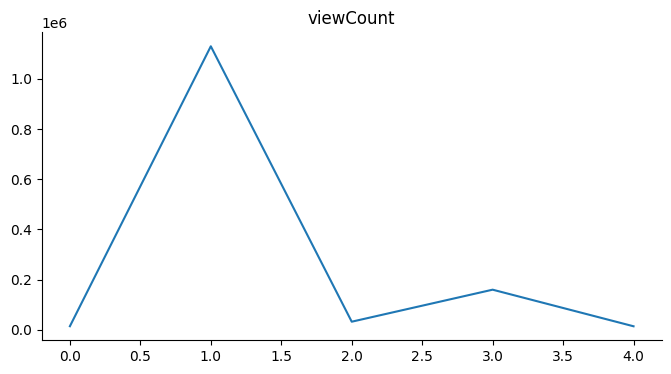

In [98]:
# @title viewCount

from matplotlib import pyplot as plt
video_df['viewCount'].plot(kind='line', figsize=(8, 4), title='viewCount')
plt.gca().spines[['top', 'right']].set_visible(False)

WordCloud for video titles

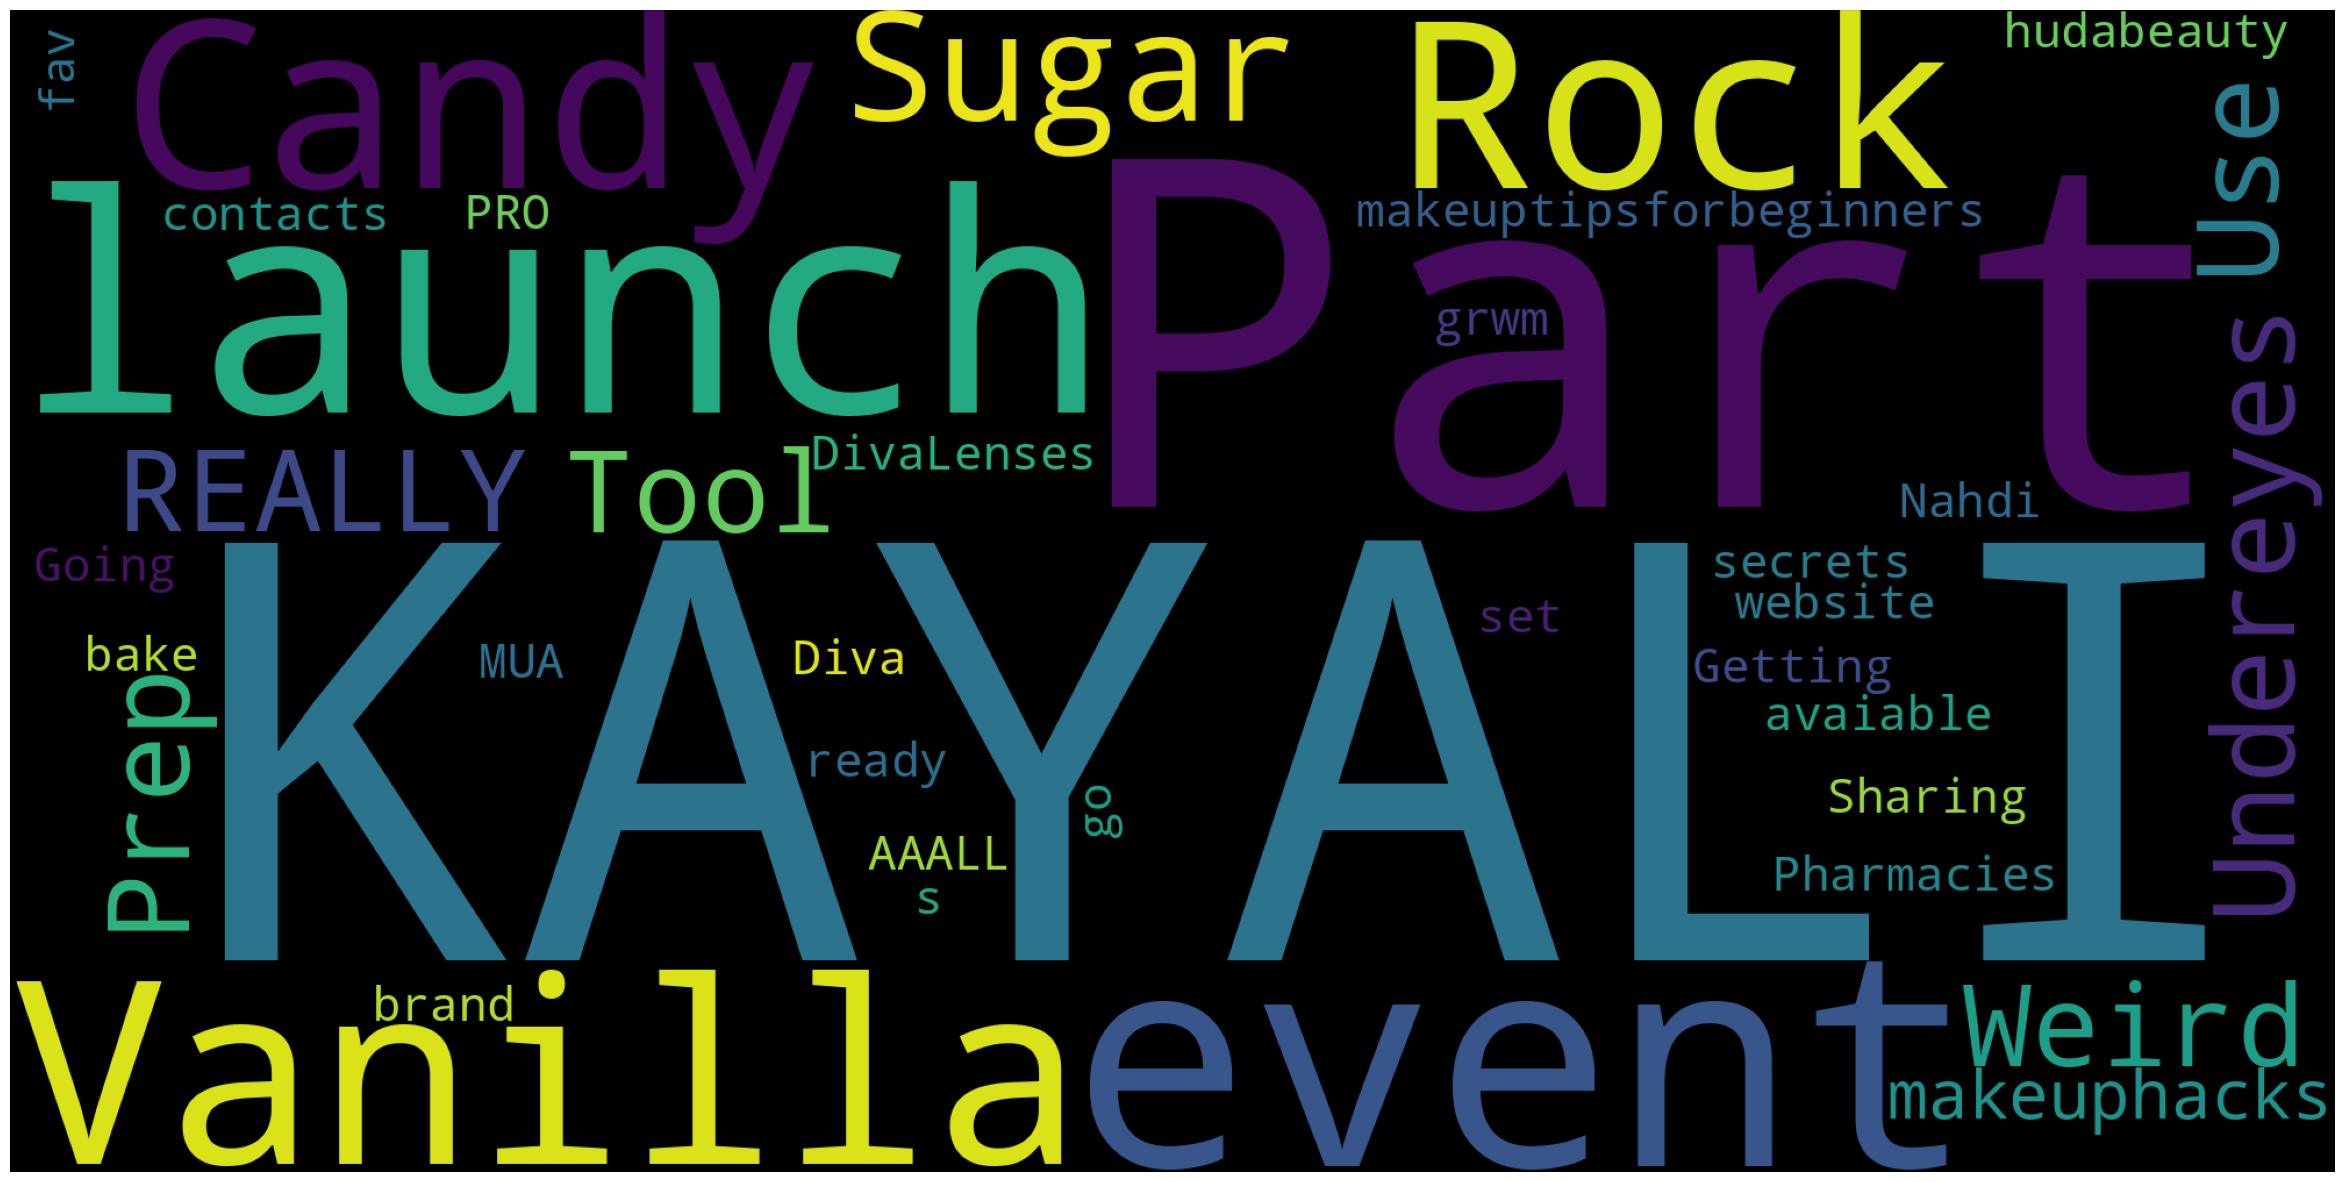

In [94]:
stop_words = set(stopwords.words('english'))
video_df['title_no_stopwords'] = video_df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in video_df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words)

def plot_cloud(word_cloud):
    plt.figure(figsize=(30,20))
    plt.imshow(word_cloud)
    plt.axis("off");

wordcloud = WordCloud(width= 2000, height=1000, random_state=1, background_color='black',
                      colormap='viridis', collocations = False).generate(all_words_str)
plot_cloud(wordcloud)

Upload Schedule

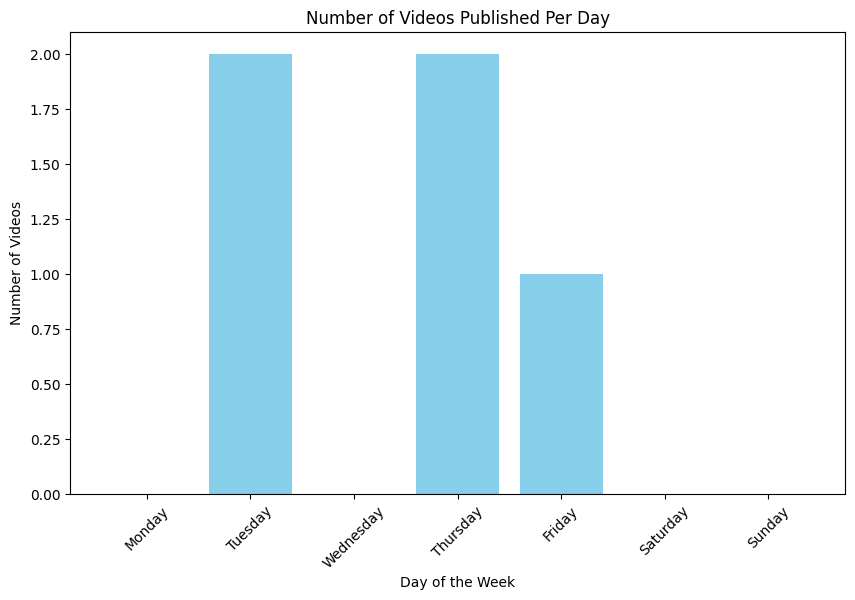

In [95]:
day_df = pd.DataFrame(video_df['publishDayName'].value_counts())

# Making sure all days of the week are included even if some days have zero videos
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays, fill_value=0)  # fill_value ensures that missing days are set to zero

# Resetting the index to turn it into a column
day_df = day_df.reset_index()
day_df.columns = ['Day of the Week', 'Number of Videos']  # Renaming columns for clarity

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(10, 6))  # Setting the size of the figure
bar_plot = ax.bar(day_df['Day of the Week'], day_df['Number of Videos'], color='skyblue')

# Adding title and labels
plt.title('Number of Videos Published Per Day')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Videos')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()
